<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#===-Import-===" data-toc-modified-id="===-Import-===-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>=== Import ===</a></span></li><li><span><a href="#===-Explore-===" data-toc-modified-id="===-Explore-===-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>=== Explore ===</a></span></li><li><span><a href="#===-Algorithm-=-Classification-===" data-toc-modified-id="===-Algorithm-=-Classification-===-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>=== Algorithm = Classification ===</a></span></li><li><span><a href="#===-Validation-===" data-toc-modified-id="===-Validation-===-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>=== Validation ===</a></span></li></ul></div>

# === Import ===

In [30]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.datasets import load_iris

In [31]:
iris = load_iris()
X = iris.data
Y = iris.target
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [41]:
iris_data = DataFrame(X,columns=['SepalLength','SepalWidth','PetalLength','PetalWidth'])
iris_target = DataFrame(Y,columns=['Species'])

def flower(num): return iris.target_names[num]
iris_target['Species'] = iris_target['Species'].apply(flower)

iris = pd.concat([iris_data,iris_target],axis=1)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# === Explore ===

C:\Users\kinar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


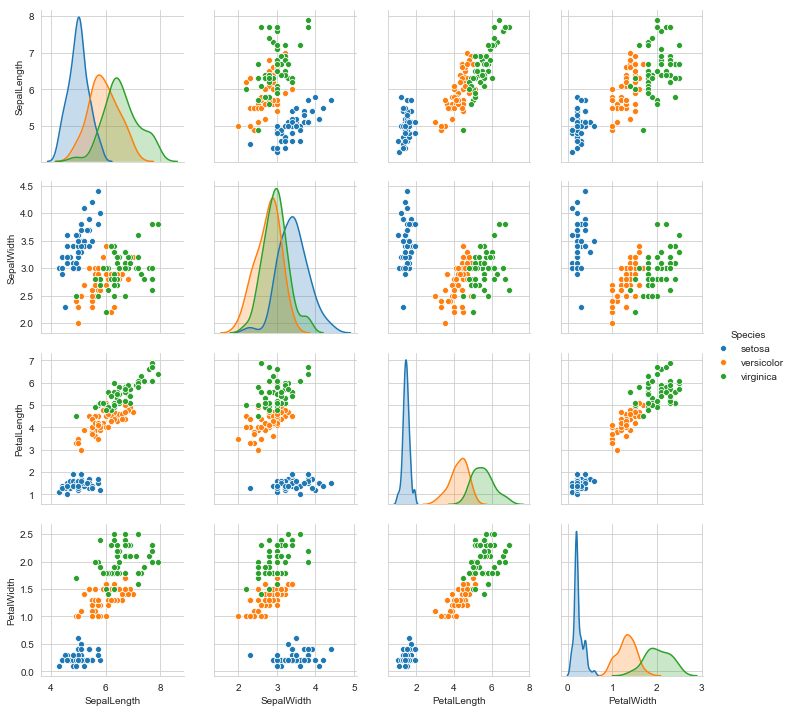

In [52]:
# display the correletion between all the features

sns.pairplot(iris,hue='Species')

C:\Users\kinar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


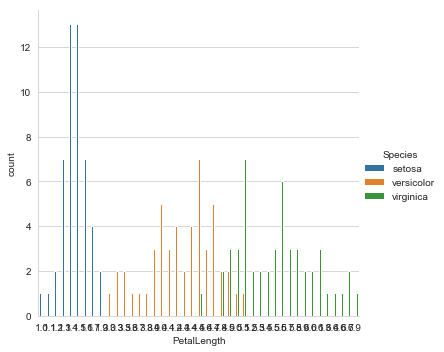

In [54]:
# show histogram of the data

sns.factorplot('PetalLength',data=iris,kind='count',hue='Species')

C:\Users\kinar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


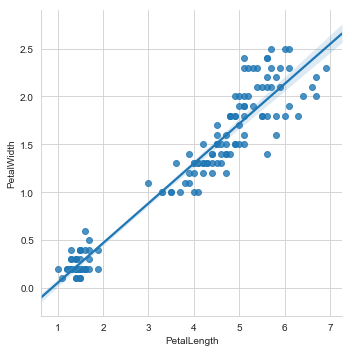

In [63]:
# try to reduce features by correlation

sns.lmplot(data=iris,x='PetalLength',y='PetalWidth')

# === Algorithm = Classification ===

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
Xtrain, Xtest, Ytrain,Ytest = train_test_split(X,Y,test_size=0.4,random_state=8)

In [72]:
logreg.fit(Xtrain,Ytrain)

C:\Users\kinar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kinar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# === Validation ===

In [74]:
from sklearn import metrics
Ypred = logreg.predict(Xtest)
print(metrics.accuracy_score(Ytest,Ypred))

0.9833333333333333
